# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [100]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [101]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 609


In [43]:
cities

['nidderau',
 'olonkinbyen',
 'usinsk',
 'albany',
 'menongue',
 'minot',
 'uvira',
 'grytviken',
 'okhotsk',
 'port elizabeth',
 'bethel',
 'puerto natales',
 'lihue',
 'port-aux-francais',
 'yellowknife',
 'lerwick',
 'ouahigouya',
 'college',
 'taiohae',
 'tiksi',
 'kosciusko',
 'port mathurin',
 'whitehorse',
 'adamstown',
 'edinburgh of the seven seas',
 'betio village',
 'alice springs',
 'lebu',
 'karratha',
 'margaret river',
 'wailua homesteads',
 'orapa',
 'ushuaia',
 'hermanus',
 'pitimbu',
 'petropavlovsk-kamchatsky',
 'pangody',
 'bad abbach',
 'grande prairie',
 'puerto baquerizo moreno',
 'anadyr',
 'acajutla',
 'blackmans bay',
 'nova sintra',
 'mglin',
 'santa terezinha',
 'ribeira grande',
 'ulmeni',
 'bairnsdale',
 'alofi',
 'jiagedaqi',
 'reuleuet',
 'turpan',
 'kuta',
 'vorgashor',
 'fort bragg',
 'utrik',
 'ilulissat',
 "nar'yan-mar",
 'calvinia',
 'kanggye',
 'kerikeri',
 'i-n-salah',
 'georgetown',
 "ytyk-kyuyel'",
 'hawaiian paradise park',
 'puerto ayora',
 'n

---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [102]:
# Set the API base URL
url = "https://api.openweathermap.org/data/2.5/weather?"
city = "Paris"
# Define an empty list to fetch the weather data for each city
city_data = []

unit = "metric"
city_url = f"{url}appid={weather_api_key}&q={city}&units={unit}"
    
weather_response = requests.get(city_url)
city_weather = weather_response.json()

city_weather

{'coord': {'lon': 2.3488, 'lat': 48.8534},
 'weather': [{'id': 800,
   'main': 'Clear',
   'description': 'clear sky',
   'icon': '01d'}],
 'base': 'stations',
 'main': {'temp': 18.99,
  'feels_like': 18.75,
  'temp_min': 17.88,
  'temp_max': 20.6,
  'pressure': 1033,
  'humidity': 69},
 'visibility': 10000,
 'wind': {'speed': 4.12, 'deg': 190},
 'clouds': {'all': 0},
 'dt': 1712916860,
 'sys': {'type': 2,
  'id': 2012208,
  'country': 'FR',
  'sunrise': 1712898292,
  'sunset': 1712947037},
 'timezone': 7200,
 'id': 2988507,
 'name': 'Paris',
 'cod': 200}

In [103]:
# Set the API base URL
url = "https://api.openweathermap.org/data/2.5/weather?"
unit = "metric"
# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    #city_url = f"{url}q={city}&units=metric&appid={weather_api_key}"

    city_url = f"{url}appid={weather_api_key}&q={city}&units={unit}"
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        weather_response = requests.get(city_url)
        city_weather = weather_response.json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        city_date = city_weather["dt"]

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})
        print(record_count)
    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | trairi
2
Processing Record 2 of Set 1 | ushuaia
3
Processing Record 3 of Set 1 | grytviken
4
Processing Record 4 of Set 1 | uturoa
5
Processing Record 5 of Set 1 | bengkulu
6
Processing Record 6 of Set 1 | olonkinbyen
7
Processing Record 7 of Set 1 | vorgashor
8
Processing Record 8 of Set 1 | arraial do cabo
9
Processing Record 9 of Set 1 | remire-montjoly
10
Processing Record 10 of Set 1 | aasiaat
11
Processing Record 11 of Set 1 | bethel
12
Processing Record 12 of Set 1 | edinburgh of the seven seas
13
Processing Record 13 of Set 1 | puerto ayora
14
Processing Record 14 of Set 1 | port elizabeth
15
Processing Record 15 of Set 1 | alotau
City not found. Skipping...
Processing Record 16 of Set 1 | waimanalo
17
Processing Record 17 of Set 1 | hawaiian paradise park
18
Processing Record 18 of Set 1 | tura
19
Processing Record 19 of Set 1 | yellowknife
20
Processing Record 20 of Set 1 | saudarkrokur

In [104]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          579
Lat           579
Lng           579
Max Temp      579
Humidity      579
Cloudiness    579
Wind Speed    579
Country       579
Date          579
dtype: int64

In [105]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,trairi,-3.2778,-39.2689,25.32,94,62,1.54,BR,1712917019
1,ushuaia,-54.8000,-68.3000,7.81,76,20,12.35,AR,1712916845
2,grytviken,-54.2811,-36.5092,0.42,82,98,4.70,GS,1712917057
3,uturoa,-16.7333,-151.4333,29.08,76,97,8.97,PF,1712917057
4,bengkulu,-3.8004,102.2655,28.56,80,95,2.40,ID,1712917057


In [106]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")
#city_data_df = pd.read_csv("../output_data/cities.csv")

In [108]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,trairi,-3.2778,-39.2689,25.32,94,62,1.54,BR,1712917019
1,ushuaia,-54.8000,-68.3000,7.81,76,20,12.35,AR,1712916845
2,grytviken,-54.2811,-36.5092,0.42,82,98,4.70,GS,1712917057
3,uturoa,-16.7333,-151.4333,29.08,76,97,8.97,PF,1712917057
4,bengkulu,-3.8004,102.2655,28.56,80,95,2.40,ID,1712917057


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

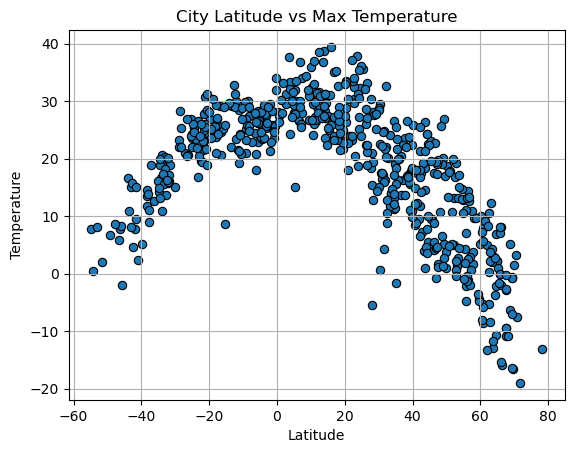

In [109]:
plt.scatter(city_data_df["Lat"], city_data_df["Max Temp"], edgecolor = "black", linewidth = 0.80)
plt.title("City Latitude vs Max Temperature")
plt.xlabel("Latitude")
plt.ylabel("Temperature")
plt.grid()
plt.show()

#### Latitude Vs. Humidity

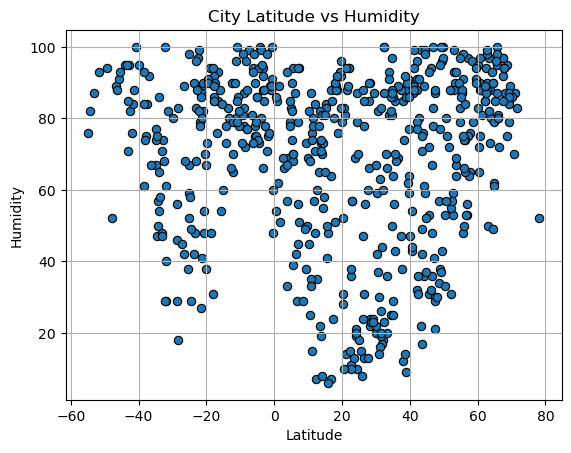

<Figure size 640x480 with 0 Axes>

In [110]:
# Build the scatter plots for latitude vs. humidity
plt.scatter(city_data_df["Lat"], city_data_df["Humidity"], edgecolor = "black", linewidth = 0.80)

# Incorporate the other graph properties
plt.title("City Latitude vs Humidity")
plt.xlabel("Latitude")
plt.ylabel("Humidity")
plt.grid()
plt.show()
# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

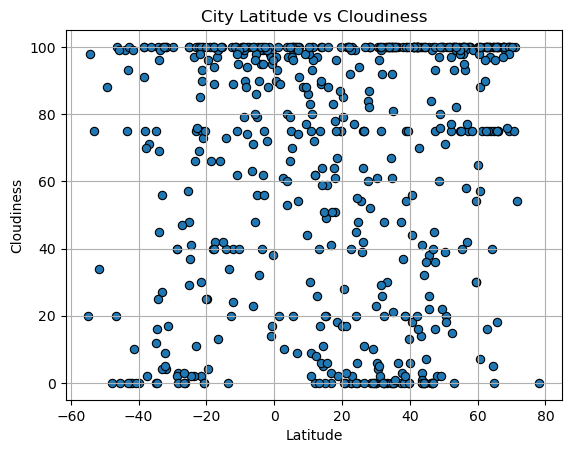

<Figure size 640x480 with 0 Axes>

In [113]:
# Build the scatter plots for latitude vs. cloudiness
plt.scatter(city_data_df["Lat"], city_data_df["Cloudiness"], edgecolor = "black", linewidth = 0.80)

# YOUR CODE HERE
plt.title("City Latitude vs Cloudiness")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")
plt.grid()
plt.show()

# Incorporate the other graph properties
# YOUR CODE HERE

# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

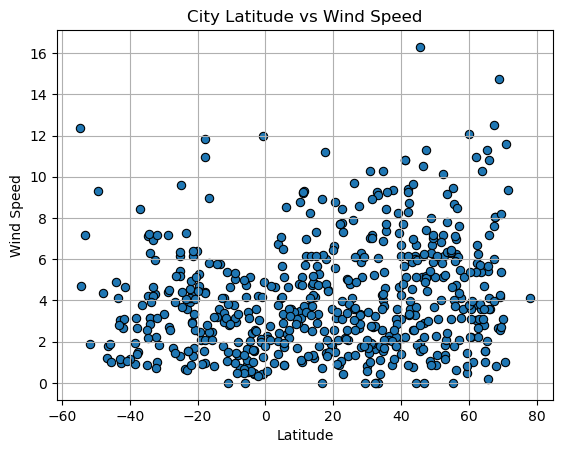

<Figure size 640x480 with 0 Axes>

In [114]:
# Build the scatter plots for latitude vs. wind speed
# YOUR CODE HERE
plt.scatter(city_data_df["Lat"], city_data_df["Wind Speed"], edgecolor = "black", linewidth = 0.80)
plt.title("City Latitude vs Wind Speed")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed")
plt.grid()
plt.show()
# Incorporate the other graph properties
# YOUR CODE HERE

# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [119]:
# Define a function to create Linear Regression plots

def linearRegression(x_values, y_values, regEQplotx, y_label):
    (slope, intercept, rvalue, pvalue, stder) = linregress(x_values, y_values)
    regress_values = x_values * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    plt.scatter(x_values, y_values)
    plt.plot(x_values, regress_values, "r-")
    print(f"the r-square is {rvalue}")
    print(line_eq)
    plt.annotate(line_eq,(regEQplotx,regEQploty),fontsize = 18,color = "blue")
    plt.xlabel("Latitude")
    plt.ylabel(f"{y_label}")
    plt.grid()





In [120]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df.loc[city_data_df["Lat"]>=0]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
5,olonkinbyen,70.9221,-8.7187,-7.49,87,100,11.57,SJ,1712917057
6,vorgashor,67.5833,63.9500,-2.89,97,100,6.03,RU,1712917058
8,remire-montjoly,4.9167,-52.2667,28.02,83,75,5.66,GF,1712917058
9,aasiaat,68.7098,-52.8699,-6.26,95,100,2.68,GL,1712917058
10,bethel,41.3712,-73.4140,18.05,89,100,5.14,US,1712917005


In [121]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df.loc[city_data_df["Lat"]<=0]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,trairi,-3.2778,-39.2689,25.32,94,62,1.54,BR,1712917019
1,ushuaia,-54.8000,-68.3000,7.81,76,20,12.35,AR,1712916845
2,grytviken,-54.2811,-36.5092,0.42,82,98,4.70,GS,1712917057
3,uturoa,-16.7333,-151.4333,29.08,76,97,8.97,PF,1712917057
4,bengkulu,-3.8004,102.2655,28.56,80,95,2.40,ID,1712917057


###  Temperature vs. Latitude Linear Regression Plot

the r-square is -0.8454588599266112
y = -0.55x + 36.57


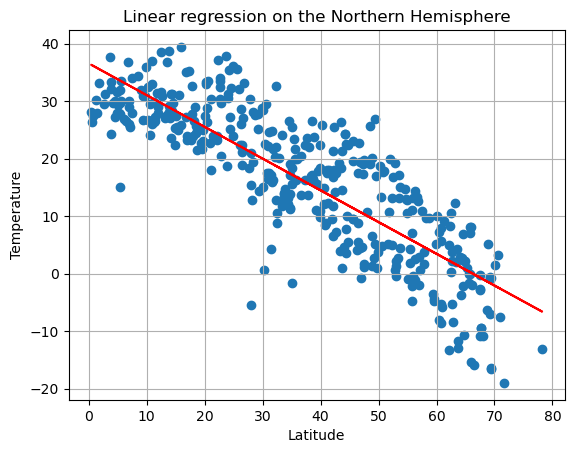

In [122]:
# Linear regression on Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
regEQplotx = 0
regEQploty = 60
y_label = "Temperature"
plt.title(f"Linear regression on the Northern Hemisphere")
linearRegression(x_values, y_values, regEQplotx, y_label)
plt.show()


the r-square is 0.7904620800805816
y = 0.41x + 30.15


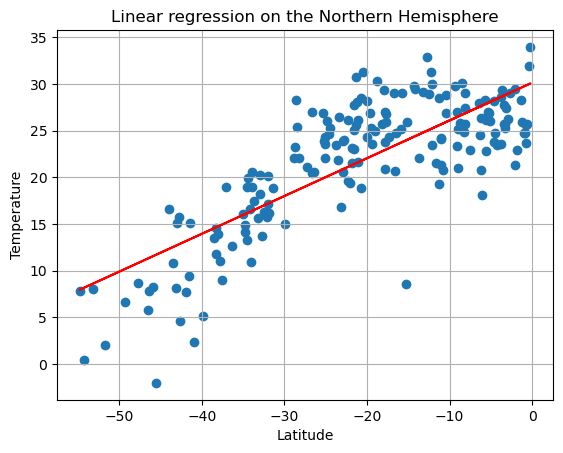

In [123]:
# Linear regression on Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
regEQplotx = 0
regEQploty = 60
y_label = "Temperature"
plt.title(f"Linear regression on the Northern Hemisphere")
linearRegression(x_values, y_values, regEQplotx, y_label)
plt.show()


**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Humidity vs. Latitude Linear Regression Plot

the r-square is 0.2788753847258893
y = 0.37x + 52.36


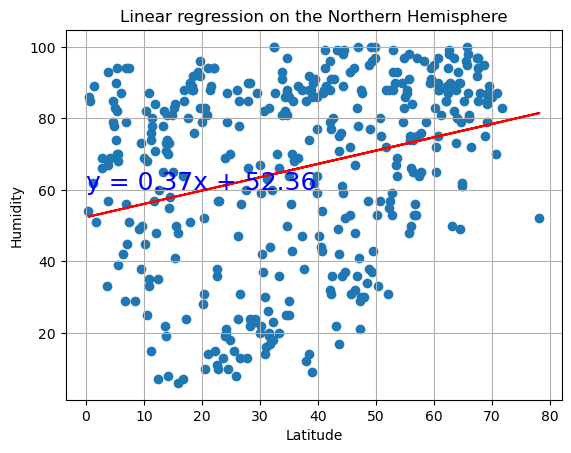

In [124]:
# Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
regEQplotx = 0
regEQploty = 60
y_label = "Humidity"
plt.title(f"Linear regression on the Northern Hemisphere")
linearRegression(x_values, y_values, regEQplotx, y_label)
plt.show()

the r-square is 0.16780380442844733
y = 0.22x + 80.79


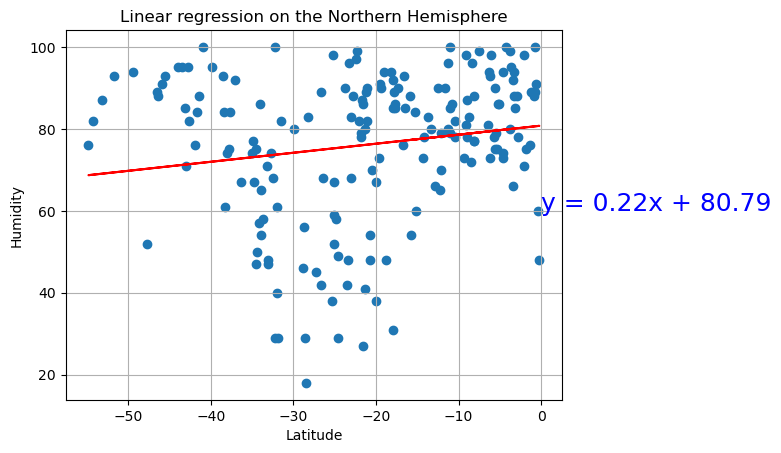

In [125]:
# Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
regEQplotx = 0
regEQploty = 60
y_label = "Humidity"
plt.title(f"Linear regression on the Northern Hemisphere")
linearRegression(x_values, y_values, regEQplotx, y_label)
plt.show()

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Cloudiness vs. Latitude Linear Regression Plot

the r-square is 0.1597495655710516
y = 0.31x + 52.49


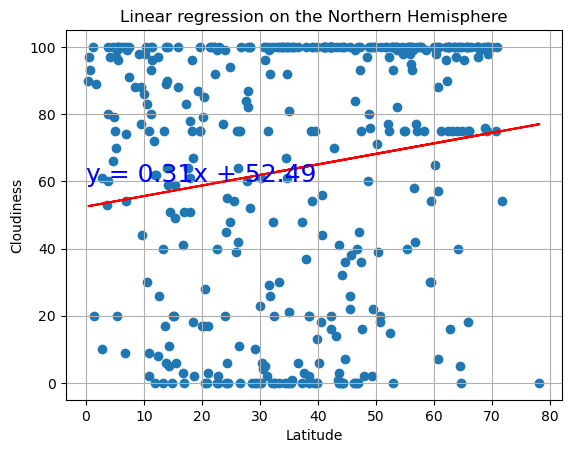

In [126]:
# Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]
regEQplotx = 0
regEQploty = 60
y_label = "Cloudiness"
plt.title(f"Linear regression on the Northern Hemisphere")
linearRegression(x_values, y_values, regEQplotx, y_label)
plt.show()

the r-square is 0.2964404262908659
y = 0.8x + 80.75


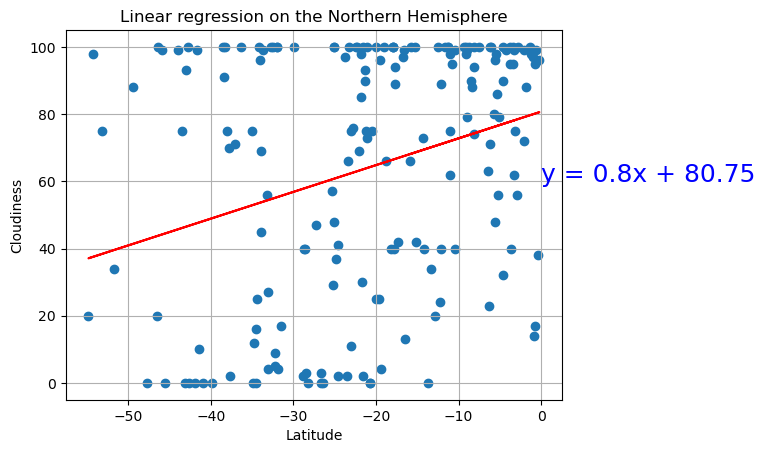

In [127]:
# Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
regEQplotx = 0
regEQploty = 60
y_label = "Cloudiness"
plt.title(f"Linear regression on the Northern Hemisphere")
linearRegression(x_values, y_values, regEQplotx, y_label)
plt.show()

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Wind Speed vs. Latitude Linear Regression Plot

the r-square is 0.15921100512819095
y = 0.02x + 3.59


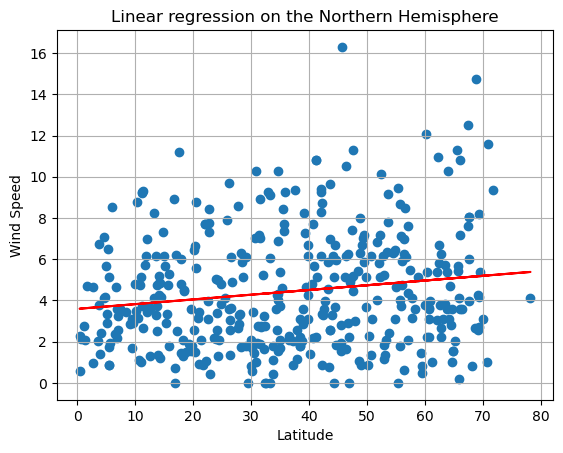

In [128]:
# Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
regEQplotx = 0
regEQploty = 60
y_label = "Wind Speed"
plt.title(f"Linear regression on the Northern Hemisphere")
linearRegression(x_values, y_values, regEQplotx, y_label)
plt.show()

the r-square is -0.2021089762271626
y = -0.03x + 2.65


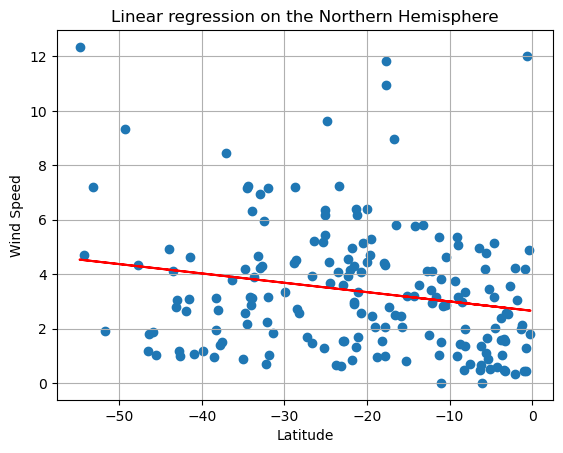

In [129]:
# Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
regEQplotx = 0
regEQploty = 60
y_label = "Wind Speed"
plt.title(f"Linear regression on the Northern Hemisphere")
linearRegression(x_values, y_values, regEQplotx, y_label)
plt.show()

**Discussion about the linear relationship:** YOUR RESPONSE HERE